In [271]:
#1
import pandas as pd 
import matplotlib.pyplot as plt


In [272]:
# Leemos con el separador original
archivo = pd.read_csv('Sueldo_Funcionarios_2024.csv', sep=';', encoding='latin1')

# Lo guardamos como CSV estándar con coma
archivo.to_csv('Sueldo_Funcionarios_2024_comas.csv', index=False)


In [273]:
archivo = pd.read_csv('Sueldo_Funcionarios_2024_comas.csv')

In [274]:
df =pd.DataFrame(archivo)

In [304]:
print(df.head())

            CUIL   AÑO  MES APELLIDO_Y_NOMBRE       REPARTICION  \
0  20-17366881-4  2024    1      MACRI, JORGE  Jefe de Gobierno   
1  20-17366881-4  2024    2      MACRI, JORGE  Jefe de Gobierno   
2  20-17366881-4  2024    3      MACRI, JORGE  Jefe de Gobierno   
3  20-17366881-4  2024    4      MACRI, JORGE  Jefe de Gobierno   
4  20-17366881-4  2024    5      MACRI, JORGE  Jefe de Gobierno   

   ASIGNACIÓN POR CARGO  AGUINALDO  TOTAL SALARIO BRUTO  
0               4084180  2756091.0              4084180  
1               4696808  2756091.0              4696808  
2               5354361  2756091.0              5354361  
3               5889797  2756091.0              5889797  
4               6243184  2756091.0              6243184  


In [296]:
#suma de datos nulos
print(df.isnull().sum())

CUIL                    0
AÑO                     0
MES                     0
APELLIDO_Y_NOMBRE       0
REPARTICION             0
ASIGNACIÓN POR CARGO    0
AGUINALDO               0
TOTAL SALARIO BRUTO     0
dtype: int64


In [277]:
#tipo
print(df.dtypes)

CUIL                     object
AÑO                       int64
MES                       int64
APELLIDO_Y_NOMBRE        object
REPARTICION              object
ASIGNACIÓN POR CARGO     object
AGUINALDO                object
TOTAL SALARIO BRUTO      object
OBSERVACIONES           float64
dtype: object


In [278]:
print(df['AGUINALDO'])

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
           ...      
374              NaN
375     $ 1.529.800 
376              NaN
377     $ 1.019.867 
378       $ 339.956 
Name: AGUINALDO, Length: 379, dtype: object


In [279]:
df['TOTAL SALARIO BRUTO'] = df['TOTAL SALARIO BRUTO'].str.replace(r"[\$]", "", regex=True)
df['TOTAL SALARIO BRUTO'] = df['TOTAL SALARIO BRUTO'].str.replace('.', '', regex=False)

print(df['TOTAL SALARIO BRUTO'])

0        4084180 
1        4696808 
2        5354361 
3        5889797 
4        6243184 
          ...    
374      5968934 
375      7649002 
376      5968934 
377      7139068 
378      4419423 
Name: TOTAL SALARIO BRUTO, Length: 379, dtype: object


In [280]:
df['AGUINALDO']= df['AGUINALDO'].str.replace(r"[\$,]","", regex=True)
# 

In [281]:
df['ASIGNACIÓN POR CARGO']= df['ASIGNACIÓN POR CARGO'].str.replace(r"[\$,]","",regex=True)
df["ASIGNACIÓN POR CARGO"] = df['ASIGNACIÓN POR CARGO'].str.replace(r"[.\s]", "", regex=True)
print(df['ASIGNACIÓN POR CARGO'])

0      4084180
1      4696808
2      5354361
3      5889797
4      6243184
        ...   
374    5968934
375    6119201
376    5968934
377    6119201
378    4079468
Name: ASIGNACIÓN POR CARGO, Length: 379, dtype: object


In [282]:
df['AGUINALDO'] = df['AGUINALDO'].str.replace(r"[.\s]", "", regex=True)


In [283]:
df['AGUINALDO'] = pd.to_numeric(df['AGUINALDO'], errors='coerce')
print(df.get('AGUINALDO'))

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
374          NaN
375    1529800.0
376          NaN
377    1019867.0
378     339956.0
Name: AGUINALDO, Length: 379, dtype: float64


In [284]:
print(df['AGUINALDO'].max())
print(df['AGUINALDO'].min())
print(df["AGUINALDO"].head(20))

4147285.0
100211.0
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5     3246456.0
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11    3918681.0
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17    3246456.0
18          NaN
19          NaN
Name: AGUINALDO, dtype: float64


In [285]:
print(df["AGUINALDO"].median())

2756091.0


In [286]:
df["AGUINALDO"].fillna(df['AGUINALDO'].median(), inplace=True)
print(df['AGUINALDO'].head())

0    2756091.0
1    2756091.0
2    2756091.0
3    2756091.0
4    2756091.0
Name: AGUINALDO, dtype: float64


C:\Users\IPF-2025\AppData\Local\Temp\ipykernel_18372\965769308.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["AGUINALDO"].fillna(df['AGUINALDO'].median(), inplace=True)


In [287]:
print(df['OBSERVACIONES'].head(1000))

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
374   NaN
375   NaN
376   NaN
377   NaN
378   NaN
Name: OBSERVACIONES, Length: 379, dtype: float64


In [288]:
df.drop('OBSERVACIONES', axis=1, inplace=True)


In [289]:
print(df.head())

            CUIL   AÑO  MES APELLIDO_Y_NOMBRE       REPARTICION  \
0  20-17366881-4  2024    1      MACRI, JORGE  Jefe de Gobierno   
1  20-17366881-4  2024    2      MACRI, JORGE  Jefe de Gobierno   
2  20-17366881-4  2024    3      MACRI, JORGE  Jefe de Gobierno   
3  20-17366881-4  2024    4      MACRI, JORGE  Jefe de Gobierno   
4  20-17366881-4  2024    5      MACRI, JORGE  Jefe de Gobierno   

  ASIGNACIÓN POR CARGO  AGUINALDO TOTAL SALARIO BRUTO  
0              4084180  2756091.0            4084180   
1              4696808  2756091.0            4696808   
2              5354361  2756091.0            5354361   
3              5889797  2756091.0            5889797   
4              6243184  2756091.0            6243184   


In [290]:
#promedio
result = df['AGUINALDO'].mean()
print("promedio",result)
#media
result2 = df['AGUINALDO'].median()
print("media",result2)
#desviacion estandar
result3= df['AGUINALDO'].std()
print("desviacion estandar",result3)

promedio 2741999.9841688653
media 2756091.0
desviacion estandar 361109.12522332545


In [291]:
df['ASIGNACIÓN POR CARGO'] = pd.to_numeric(df['ASIGNACIÓN POR CARGO'], errors='coerce')
#promedio
result = df['ASIGNACIÓN POR CARGO'].mean()
print("promedio",result)
#media
result2 = df['ASIGNACIÓN POR CARGO'].median()
print("media",result2)
#desviacion estandar
result3= df['ASIGNACIÓN POR CARGO'].std()
print("desviacion estandar",result3)


promedio 5290067.137203166
media 5417956.0
desviacion estandar 1068922.5793798275


In [292]:
df['TOTAL SALARIO BRUTO'] = pd.to_numeric(df['TOTAL SALARIO BRUTO'], errors='coerce')
#promedio
result = df['TOTAL SALARIO BRUTO'].mean()
print("promedio",result)
#media
result2 = df['TOTAL SALARIO BRUTO'].median()
print("media",result2)
#desviacion estandar
result3= df['TOTAL SALARIO BRUTO'].std()
print("desviacion estandar",result3)

promedio 5777744.596306069
media 5568224.0
desviacion estandar 1720306.7243481507


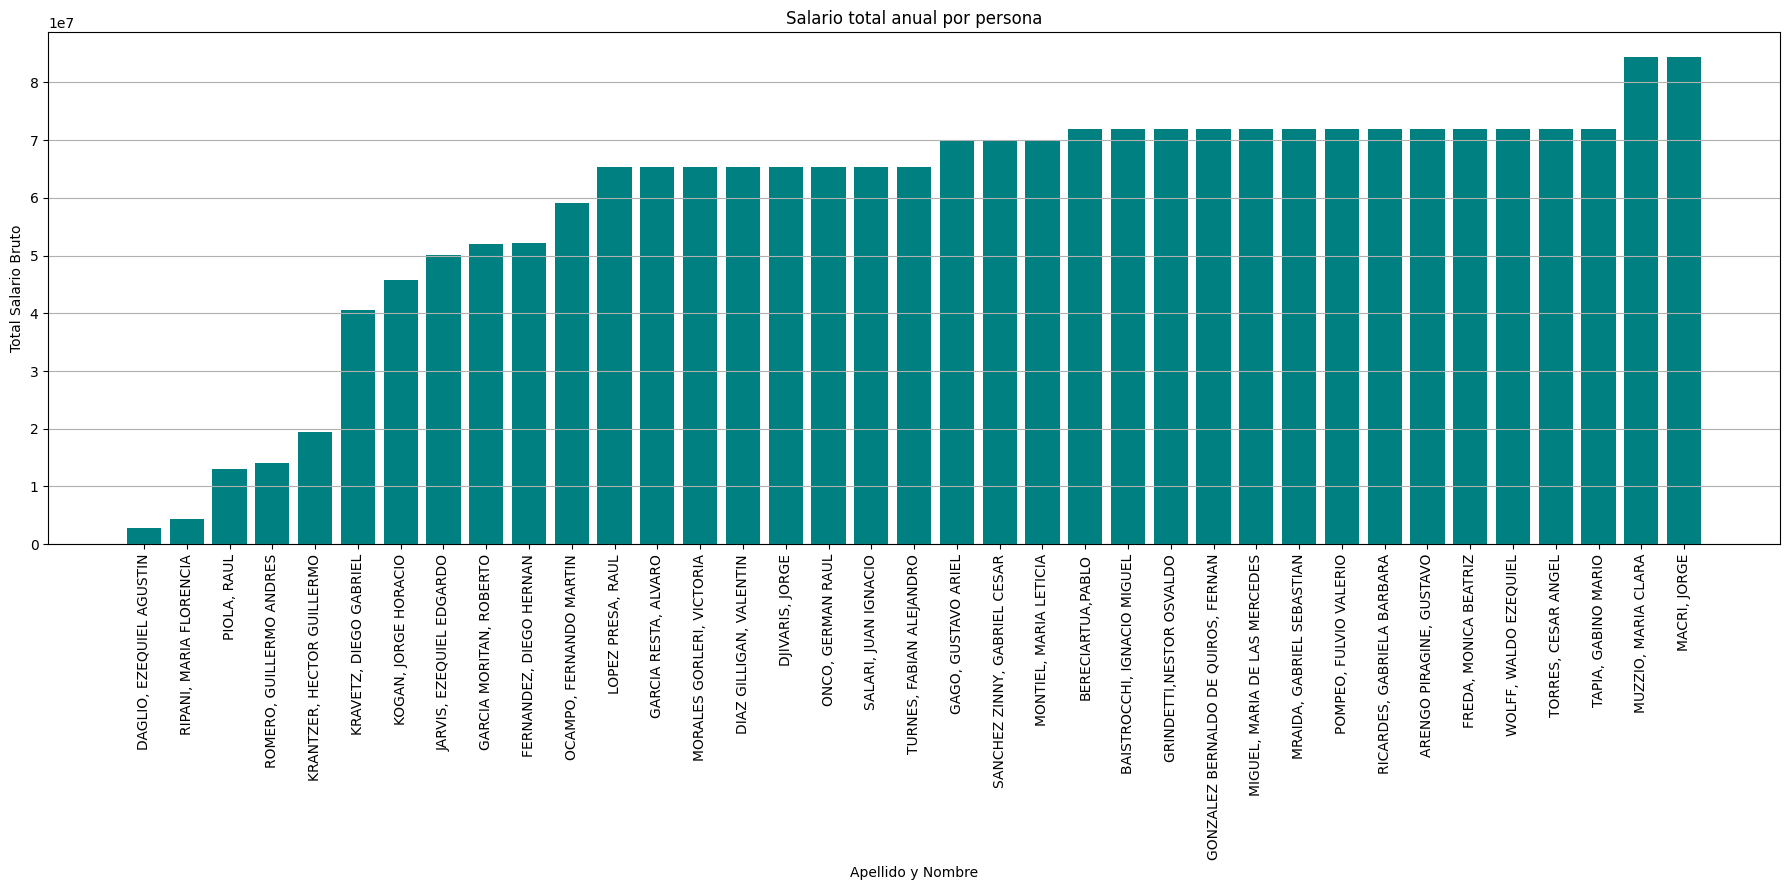

In [305]:
registro = df.groupby('APELLIDO_Y_NOMBRE')['TOTAL SALARIO BRUTO'].sum()
registro = registro.sort_values(ascending=True)

plt.figure(figsize=(18, 9))
plt.bar(registro.index, registro.values, color='teal')
plt.title('Salario total anual por persona')
plt.xlabel('Apellido y Nombre')
plt.ylabel('Total Salario Bruto')
plt.xticks(rotation=90)  # Para que los nombres no se encimen
plt.grid(axis='y')
plt.tight_layout()
plt.show()

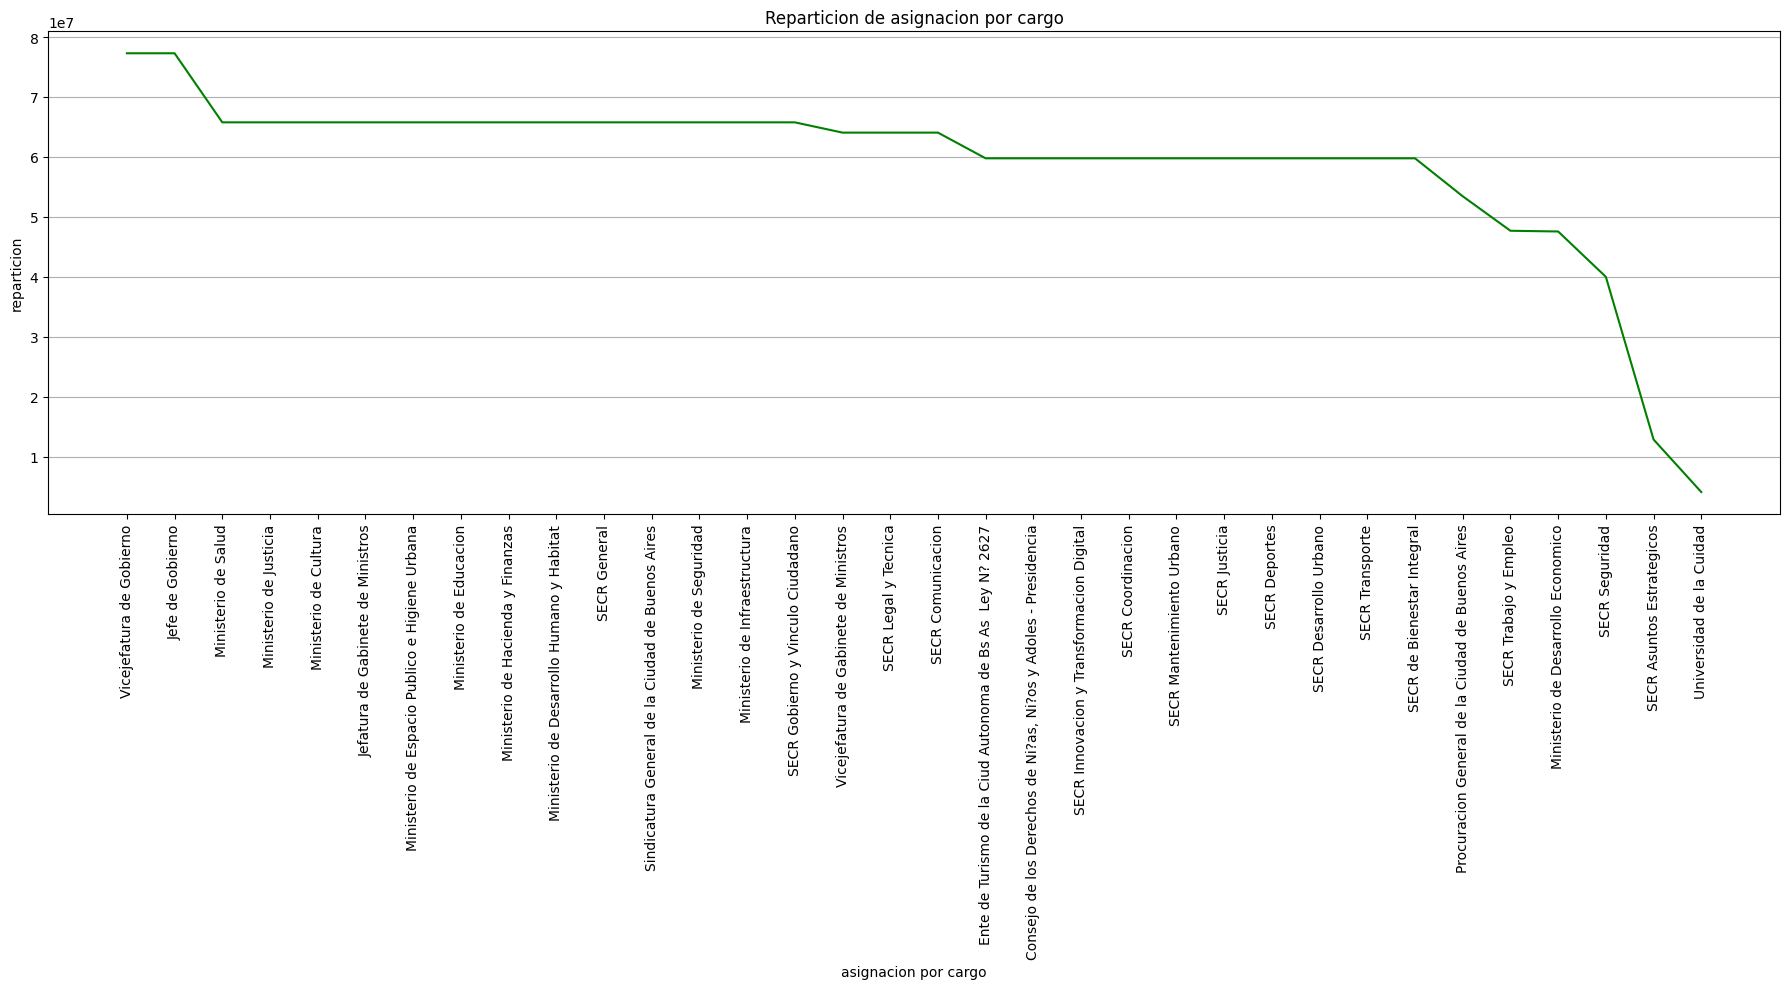

In [ ]:
registro2=df.groupby('REPARTICION')['ASIGNACIÓN POR CARGO'].sum()
registro2= registro2.sort_values(ascending=False)

plt.figure(figsize=(18,10))
plt.bar(registro2.index,registro2.values,color='green')
plt.title("Reparticion de asignacion por cargo")
plt.xlabel('asignacion por cargo')
plt.ylabel('reparticion')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()